We'd also like to know the distribution of tax rates for each county.

The data should have the tax amounts and tax value of the home, so it shouldn't be too hard to calculate. Please include in your report to us the distribution of tax rates for each county so that we can see how much they vary within the properties in the county and the rates the bulk of the properties sit around.

Note that this is separate from the model you will build, because if you use tax amount in your model, you would be using a future data point to predict a future data point, and that is cheating! In other words, for prediction purposes, we won't know tax amount until we know tax value.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matt_property_locations
from matt_property_locations import get_property_data


In [2]:
df = get_property_data()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139876 entries, 0 to 1139875
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   regionidzip        1136162 non-null  float64
 1   regionidcounty     1139876 non-null  float64
 2   taxamount          1132358 non-null  float64
 3   taxvaluedollarcnt  1127774 non-null  float64
dtypes: float64(4)
memory usage: 43.5 MB


In [4]:
df.head()

,regionidzip,regionidcounty,taxamount,taxvaluedollarcnt
0,96337.0,3101.0,NaN,9.0
1,96337.0,3101.0,NaN,27516.0
2,96095.0,3101.0,20800.37,1434941.0
3,96424.0,3101.0,14557.57,1174475.0
4,96450.0,3101.0,5725.17,440101.0


In [5]:
df.regionidzip.isnull().value_counts()

False    1136162
True        3714
Name: regionidzip, dtype: int64

In [6]:
df.taxamount.isnull().value_counts()

False    1132358
True        7518
Name: taxamount, dtype: int64

In [7]:
df.taxvaluedollarcnt.isnull().value_counts()

False    1127774
True       12102
Name: taxvaluedollarcnt, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.regionidzip.isnull().value_counts()

False    1119567
Name: regionidzip, dtype: int64

In [10]:
df.taxamount.isnull().value_counts()

False    1119567
Name: taxamount, dtype: int64

In [11]:
df.taxvaluedollarcnt.isnull().value_counts()

False    1119567
Name: taxvaluedollarcnt, dtype: int64

In [12]:
df.shape

(1119567, 4)

In [13]:
df.head()

,regionidzip,regionidcounty,taxamount,taxvaluedollarcnt
2,96095.0,3101.0,20800.37,1434941.0
3,96424.0,3101.0,14557.57,1174475.0
4,96450.0,3101.0,5725.17,440101.0
5,96446.0,3101.0,3661.28,287634.0
6,96049.0,3101.0,6773.34,563029.0


In [14]:
df['tax_rate'] = df.taxamount / df.taxvaluedollarcnt

In [15]:
df.head()

,regionidzip,regionidcounty,taxamount,taxvaluedollarcnt,tax_rate
2,96095.0,3101.0,20800.37,1434941.0,0.014496
3,96424.0,3101.0,14557.57,1174475.0,0.012395
4,96450.0,3101.0,5725.17,440101.0,0.013009
5,96446.0,3101.0,3661.28,287634.0,0.012729
6,96049.0,3101.0,6773.34,563029.0,0.012030


In [16]:
(df.tax_rate > .04).value_counts()

False    1117258
True        2309
Name: tax_rate, dtype: int64

In [17]:
zip_tax = df.groupby('regionidzip').tax_rate.mean()

In [18]:
zip_tax.head()

regionidzip
95982.0    0.018451
95983.0    0.016292
95984.0    0.014299
95985.0    0.012702
95986.0    0.012284
Name: tax_rate, dtype: float64

In [19]:
df.head()

,regionidzip,regionidcounty,taxamount,taxvaluedollarcnt,tax_rate
2,96095.0,3101.0,20800.37,1434941.0,0.014496
3,96424.0,3101.0,14557.57,1174475.0,0.012395
4,96450.0,3101.0,5725.17,440101.0,0.013009
5,96446.0,3101.0,3661.28,287634.0,0.012729
6,96049.0,3101.0,6773.34,563029.0,0.012030


In [20]:
result = pd.merge(df, zip_tax, on='regionidzip')

In [21]:
result.head()

,regionidzip,regionidcounty,taxamount,taxvaluedollarcnt,tax_rate_x,tax_rate_y
0,96095.0,3101.0,20800.37,1434941.0,0.014496,0.013249
1,96095.0,3101.0,5554.09,465989.0,0.011919,0.013249
2,96095.0,3101.0,1727.05,121376.0,0.014229,0.013249
3,96095.0,3101.0,4964.27,422000.0,0.011764,0.013249
4,96095.0,3101.0,3954.09,329244.0,0.012010,0.013249


In [22]:
result = result.rename(columns={'tax_rate_x': 'property_tax_rate', 'tax_rate_y': 'county_tax_rate', 'regionidzip': 'zipcode'})

In [23]:
result.head()

,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate
0,96095.0,3101.0,20800.37,1434941.0,0.014496,0.013249
1,96095.0,3101.0,5554.09,465989.0,0.011919,0.013249
2,96095.0,3101.0,1727.05,121376.0,0.014229,0.013249
3,96095.0,3101.0,4964.27,422000.0,0.011764,0.013249
4,96095.0,3101.0,3954.09,329244.0,0.012010,0.013249


In [24]:
result['property_tax_rate'] = round(result.property_tax_rate, 3) 

In [25]:
result.head()

,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate
0,96095.0,3101.0,20800.37,1434941.0,0.014,0.013249
1,96095.0,3101.0,5554.09,465989.0,0.012,0.013249
2,96095.0,3101.0,1727.05,121376.0,0.014,0.013249
3,96095.0,3101.0,4964.27,422000.0,0.012,0.013249
4,96095.0,3101.0,3954.09,329244.0,0.012,0.013249


In [26]:
result['county_tax_rate'] = round(result.county_tax_rate, 3)

In [27]:
result.head()

,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate
0,96095.0,3101.0,20800.37,1434941.0,0.014,0.013
1,96095.0,3101.0,5554.09,465989.0,0.012,0.013
2,96095.0,3101.0,1727.05,121376.0,0.014,0.013
3,96095.0,3101.0,4964.27,422000.0,0.012,0.013
4,96095.0,3101.0,3954.09,329244.0,0.012,0.013


In [28]:
states = pd.read_csv('states.csv')

In [29]:
states.describe()

,STATEFIPS,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
count,165935.000000,165935.000000,165935.000000,1.659350e+05,1.659350e+05,1.659350e+05,165935.000000,1.659350e+05,165935.000000,1.659350e+05,...,165935.000000,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,165935.000000,1.659350e+05
mean,29.659999,48830.358665,3.499937,1.816297e+03,8.718270e+02,6.501056e+02,256.505439,1.635178e+03,99.639377,9.564313e+02,...,58.854612,3.205651e+02,3.827916e+02,2.091741e+03,1.385090e+03,4.931203e+03,1.346609e+03,3.871452e+03,47.052762,1.005146e+03
std,15.123049,27164.072793,1.707874,3.647389e+04,2.141347e+04,1.193886e+04,6388.834209,3.257690e+04,2279.593998,1.957776e+04,...,3000.107929,1.852933e+04,7.382627e+03,6.955619e+04,2.894236e+04,1.032141e+05,2.855229e+04,7.473098e+04,1049.879512,4.896198e+04
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,18.000000,27010.000000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,5.000000e+01,...,0.000000,0.000000e+00,2.000000e+01,1.900000e+01,5.000000e+01,1.690000e+02,4.000000e+01,1.490000e+02,0.000000,0.000000e+00
50%,29.000000,48821.000000,3.000000,2.600000e+02,7.000000e+01,1.100000e+02,20.000000,2.300000e+02,0.000000,1.500000e+02,...,0.000000,0.000000e+00,6.000000e+01,1.440000e+02,1.900000e+02,6.500000e+02,1.800000e+02,5.650000e+02,0.000000,0.000000e+00
75%,42.000000,70634.000000,5.000000,1.050000e+03,3.600000e+02,3.800000e+02,90.000000,9.500000e+02,50.000000,5.600000e+02,...,0.000000,0.000000e+00,2.300000e+02,6.510000e+02,7.600000e+02,2.500000e+03,7.200000e+02,2.197000e+03,30.000000,7.200000e+01
max,56.000000,99999.000000,6.000000,5.493810e+06,3.974180e+06,1.796210e+06,932620.000000,4.785330e+06,405010.000000,3.140770e+06,...,868630.000000,5.061631e+06,1.161240e+06,1.953580e+07,4.324280e+06,1.803607e+07,4.289890e+06,9.180748e+06,217260.000000,1.206390e+07


In [30]:
states = states[['STATE', 'zipcode']]

In [31]:
states.head()

,STATE,zipcode
0,AL,0
1,AL,0
2,AL,0
3,AL,0
4,AL,0


In [32]:
states.zipcode.value_counts()

0        306
99999    306
94606      6
52531      6
83330      6
        ... 
29905      5
63140      5
66772      5
50582      5
55455      4
Name: zipcode, Length: 27558, dtype: int64

In [33]:
new_result = pd.merge(result, states, on='zipcode')

In [34]:
new_result.head()

,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate,STATE
0,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR
1,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR
2,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR
3,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR
4,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR


In [35]:
new_result.STATE.value_counts()

CA    799584
OR    710256
Name: STATE, dtype: int64

In [36]:
new_result.shape

(1509840, 7)

In [37]:
fips = pd.read_csv('zip2.csv')

In [38]:
fips.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


In [39]:
fips = fips.drop(columns=['STATE', 'STCOUNTYFP', 'CLASSFP'])

In [40]:
fips.head()

,ZIP,COUNTYNAME
0,36003,Autauga County
1,36006,Autauga County
2,36008,Autauga County
3,36022,Autauga County
4,36051,Autauga County


In [41]:
fips = fips.rename(columns={'ZIP': 'zipcode'})

In [42]:
final_result = pd.merge(new_result, fips, on='zipcode')

In [43]:
final_result.head(1000)

,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate,STATE,COUNTYNAME
0,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR,Benton County
1,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR,Benton County
2,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR,Benton County
3,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR,Benton County
4,97330.0,3101.0,174.21,2108.0,0.083,0.019,OR,Benton County
...,...,...,...,...,...,...,...,...
995,97330.0,3101.0,3330.55,210500.0,0.016,0.019,OR,Benton County
996,97330.0,3101.0,1499.23,43813.0,0.034,0.019,OR,Benton County
997,97330.0,3101.0,1499.23,43813.0,0.034,0.019,OR,Benton County
998,97330.0,3101.0,1499.23,43813.0,0.034,0.019,OR,Benton County


In [44]:
#state, county, zipcode, regionidcounty, taxamount, taxvaluedollarcnt, ...
final = final_result[['STATE', 'COUNTYNAME', 'zipcode', 'regionidcounty', 'taxamount', 'taxvaluedollarcnt', 'property_tax_rate', 'county_tax_rate' ]]

In [45]:
final.head()

,STATE,COUNTYNAME,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate
0,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
1,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
2,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
3,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
4,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019


In [46]:
final_figs = final.rename(columns={'COUNTYNAME': 'countyname', 'STATE': 'state'})
final_figs.head()

,state,countyname,zipcode,regionidcounty,taxamount,taxvaluedollarcnt,property_tax_rate,county_tax_rate
0,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
1,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
2,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
3,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019
4,OR,Benton County,97330.0,3101.0,174.21,2108.0,0.083,0.019


In [47]:
#df with countyname, county tax rate
county_tax_rate = final_figs[['countyname', 'county_tax_rate']]
county_tax_rate

,countyname,county_tax_rate
0,Benton County,0.019
1,Benton County,0.019
2,Benton County,0.019
3,Benton County,0.019
4,Benton County,0.019
...,...,...
1710775,Yamhill County,0.011
1710776,Yamhill County,0.011
1710777,Yamhill County,0.011
1710778,Yamhill County,0.011


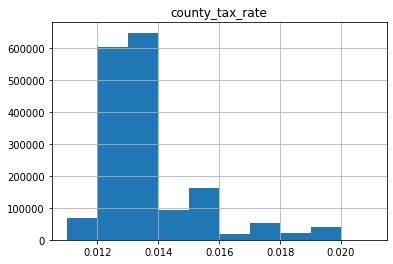

In [48]:
hist = county_tax_rate.hist()

In [49]:
county_tax_rate.countyname.value_counts()

Washington County    210672
Shasta County        197418
Clackamas County     185082
Siskiyou County      158784
Plumas County         92268
Lassen County         88014
Modoc County          79026
Columbia County       71688
Marion County         65286
Sierra County         58110
Trinity County        47370
Multnomah County      46092
Sherman County        39330
Tehama County         38088
Wasco County          38064
Mono County           30606
Hood River County     28524
Polk County           26286
Nevada County         24714
Placer County         24714
Benton County         24258
Clatsop County        23052
Yamhill County        22872
Sutter County         22728
Tillamook County      20916
Alpine County         20088
El Dorado County      11268
Colusa County          7146
Glenn County           5508
Lincoln County         1404
Lane County            1404
Name: countyname, dtype: int64

In [50]:
final_figs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710780 entries, 0 to 1710779
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   state              object 
 1   countyname         object 
 2   zipcode            float64
 3   regionidcounty     float64
 4   taxamount          float64
 5   taxvaluedollarcnt  float64
 6   property_tax_rate  float64
 7   county_tax_rate    float64
dtypes: float64(6), object(2)
memory usage: 117.5+ MB


In [67]:
# sns.set(rc={'figure.figsize':(20,10)})
# sns.scatterplot(data=final_figs, x='county_tax_rate', y='property_tax_rate', hue='countyname')

In [68]:
# sns.barplot(data=final_figs, x='county_tax_rate', y='property_tax_rate', ci=None)